In [27]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from itertools import product
from transformers import BertTokenizer, AdamW
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler
from pys.functions import CustomBertModel, create_dataset, train_with_validation
from pys.data import train_df, val_df, filtered_labels_at_least_5_list, label_mapping
from pys.params import num_epochs
%run decay_grid_search.ipynb

In [28]:
param_grid = {
    'learning_rate': [5e-5, 3e-5, 1e-5, 1e-3],
    'batch_size': [16, 32],
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

learning_rates = []
batch_sizes = []
f1_scores = []

In [29]:
def plot(acc_train, acc_val, f1_train, f1_val, loss_train, loss_val, params):
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    
    epochs = range(1, num_epochs + 1)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))  

    axes[0].plot(epochs, acc_train, color='blue', linestyle='-', label='Train Accuracy')
    axes[0].plot(epochs, acc_val, color='red', linestyle='-', label='Validation Accuracy')
    axes[0].set_title('Accuracy Over Epochs')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy (%)')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(epochs, f1_train, color='blue', linestyle='-', label='Train F1 Score')
    axes[1].plot(epochs, f1_val, color='red', linestyle='-', label='Validation F1 Score')
    axes[1].set_title('F1 Score Over Epochs')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('F1 Score')
    axes[1].legend()
    axes[1].grid(True)

    axes[2].plot(epochs, loss_train, color='blue', linestyle='-', label='Train Loss')
    axes[2].plot(epochs, loss_val, color='red', linestyle='-', label='Validation Loss')
    axes[2].set_title('Loss Over Epochs')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Loss')
    axes[2].legend()
    axes[2].grid(True)

    fig.suptitle(f"Training and Validation Metrics\n"
                 f"Learning Rate: {learning_rate}, Batch Size: {batch_size}", fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Training with params: {'learning_rate': 5e-05, 'batch_size': 16}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.189184, Accuracy: 20.634921%, F1 Score: 0.142494
Validation Accuracy: 6.250000%, Validation F1 Score: 0.015625


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.067058, Accuracy: 25.396825%, F1 Score: 0.186681
Validation Accuracy: 25.000000%, Validation F1 Score: 0.168403


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 1.889415, Accuracy: 31.746032%, F1 Score: 0.259033
Validation Accuracy: 37.500000%, Validation F1 Score: 0.265278


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.783247, Accuracy: 47.619048%, F1 Score: 0.355952
Validation Accuracy: 37.500000%, Validation F1 Score: 0.279762


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.581662, Accuracy: 58.730159%, F1 Score: 0.515344
Validation Accuracy: 56.250000%, Validation F1 Score: 0.484375


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.402400, Accuracy: 73.015873%, F1 Score: 0.678486
Validation Accuracy: 56.250000%, Validation F1 Score: 0.443750


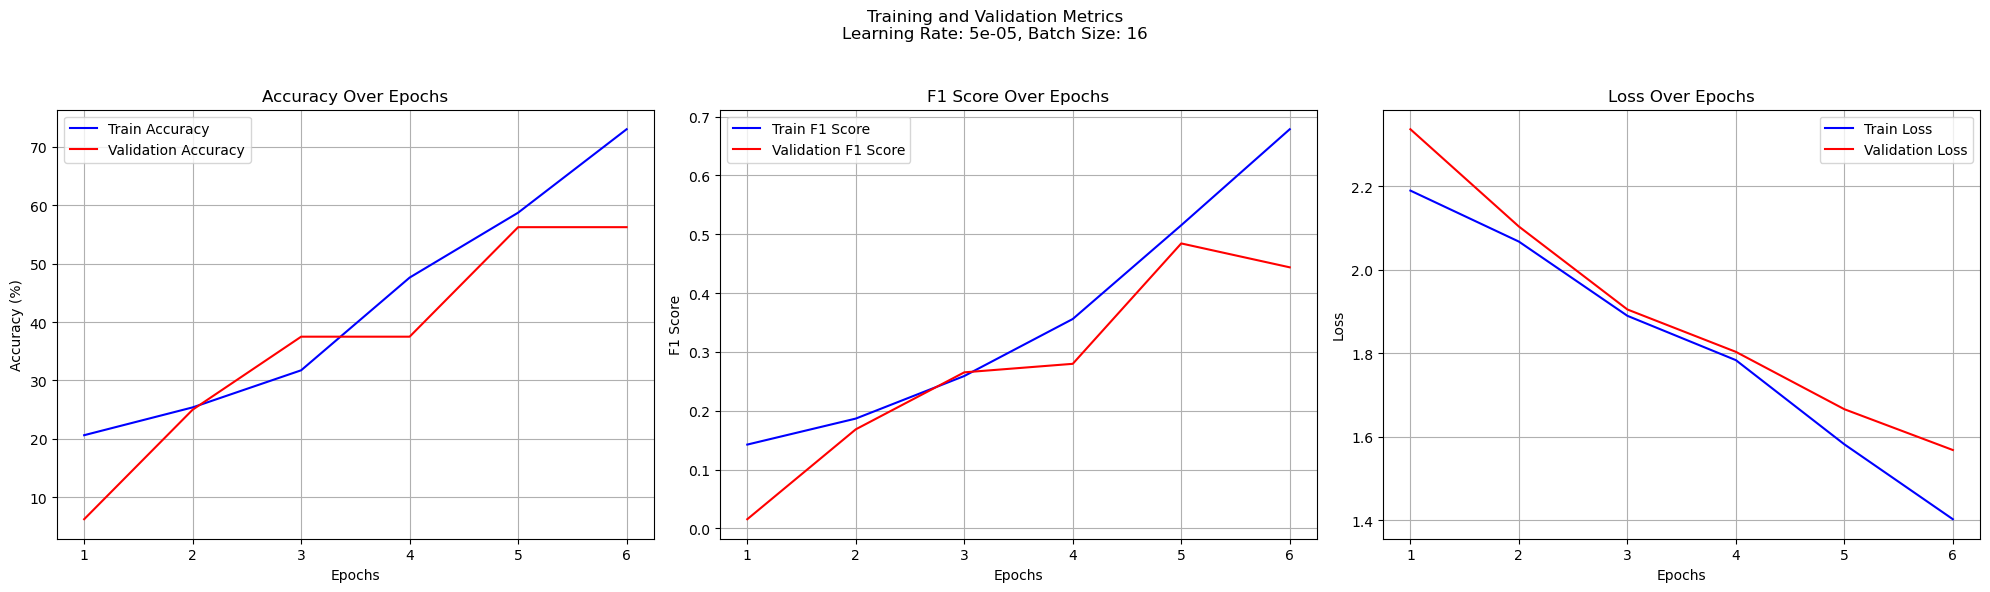

Training with params: {'learning_rate': 5e-05, 'batch_size': 32}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.282138, Accuracy: 3.174603%, F1 Score: 0.007055
Validation Accuracy: 12.500000%, Validation F1 Score: 0.050000


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.151549, Accuracy: 20.634921%, F1 Score: 0.128998
Validation Accuracy: 25.000000%, Validation F1 Score: 0.158333


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.045871, Accuracy: 28.571429%, F1 Score: 0.185582
Validation Accuracy: 25.000000%, Validation F1 Score: 0.142857


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.934034, Accuracy: 33.333333%, F1 Score: 0.262701
Validation Accuracy: 25.000000%, Validation F1 Score: 0.142857


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.861877, Accuracy: 46.031746%, F1 Score: 0.389085
Validation Accuracy: 31.250000%, Validation F1 Score: 0.170455


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.803715, Accuracy: 52.380952%, F1 Score: 0.450168
Validation Accuracy: 37.500000%, Validation F1 Score: 0.321875


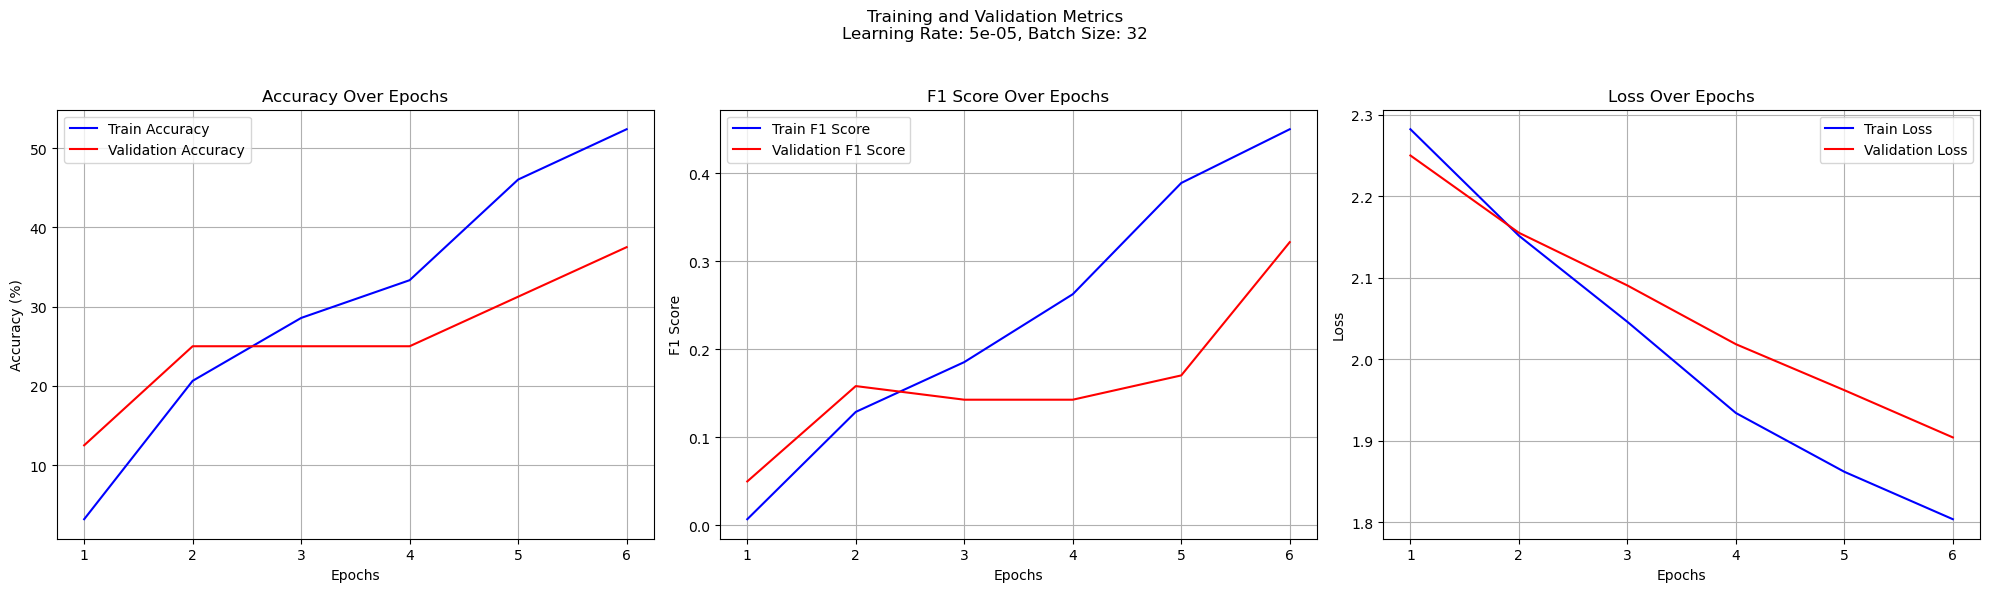

Training with params: {'learning_rate': 3e-05, 'batch_size': 16}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.336053, Accuracy: 4.761905%, F1 Score: 0.041345
Validation Accuracy: 31.250000%, Validation F1 Score: 0.180556


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.246888, Accuracy: 22.222222%, F1 Score: 0.170811
Validation Accuracy: 18.750000%, Validation F1 Score: 0.066176


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.072726, Accuracy: 23.809524%, F1 Score: 0.159219
Validation Accuracy: 0.000000%, Validation F1 Score: 0.000000


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.010979, Accuracy: 30.158730%, F1 Score: 0.226164
Validation Accuracy: 31.250000%, Validation F1 Score: 0.193182


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.837749, Accuracy: 53.968254%, F1 Score: 0.434233
Validation Accuracy: 37.500000%, Validation F1 Score: 0.206250


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.698439, Accuracy: 57.142857%, F1 Score: 0.486071
Validation Accuracy: 43.750000%, Validation F1 Score: 0.298106


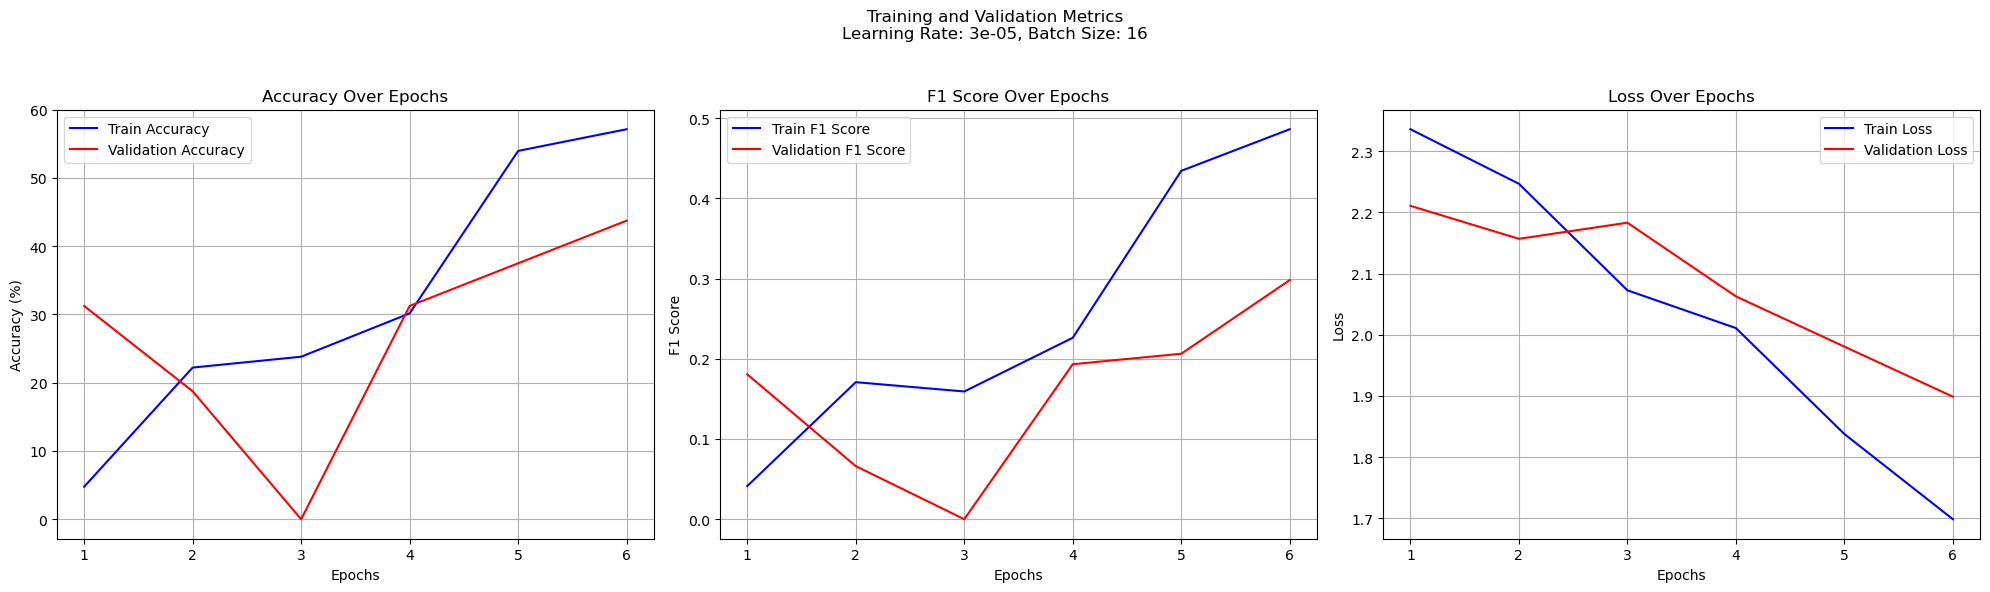

Training with params: {'learning_rate': 3e-05, 'batch_size': 32}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.237696, Accuracy: 9.523810%, F1 Score: 0.068638
Validation Accuracy: 6.250000%, Validation F1 Score: 0.008333


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.197681, Accuracy: 17.460317%, F1 Score: 0.135498
Validation Accuracy: 12.500000%, Validation F1 Score: 0.035714


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.130967, Accuracy: 19.047619%, F1 Score: 0.164817
Validation Accuracy: 31.250000%, Validation F1 Score: 0.241477


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.043802, Accuracy: 23.809524%, F1 Score: 0.206143
Validation Accuracy: 37.500000%, Validation F1 Score: 0.284226


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.958197, Accuracy: 39.682540%, F1 Score: 0.355479
Validation Accuracy: 25.000000%, Validation F1 Score: 0.195455


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.915300, Accuracy: 33.333333%, F1 Score: 0.282744
Validation Accuracy: 31.250000%, Validation F1 Score: 0.233333


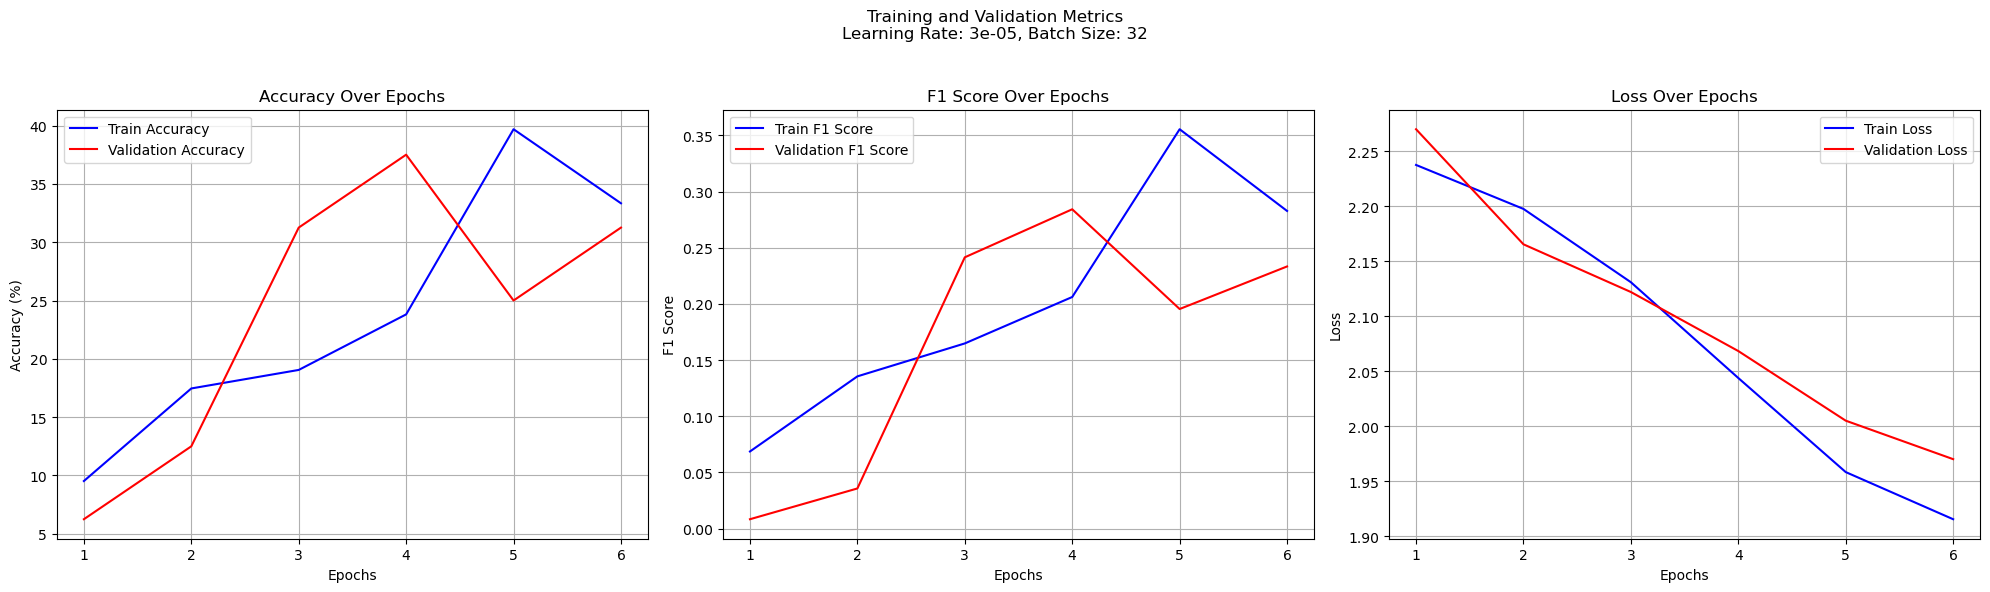

Training with params: {'learning_rate': 1e-05, 'batch_size': 16}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.209610, Accuracy: 9.523810%, F1 Score: 0.070765
Validation Accuracy: 18.750000%, Validation F1 Score: 0.099359


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.113259, Accuracy: 23.809524%, F1 Score: 0.170650
Validation Accuracy: 6.250000%, Validation F1 Score: 0.014706


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.126642, Accuracy: 25.396825%, F1 Score: 0.177832
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.096821, Accuracy: 22.222222%, F1 Score: 0.168416
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 2.038401, Accuracy: 30.158730%, F1 Score: 0.245855
Validation Accuracy: 25.000000%, Validation F1 Score: 0.183333


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.992528, Accuracy: 30.158730%, F1 Score: 0.229522
Validation Accuracy: 31.250000%, Validation F1 Score: 0.170455


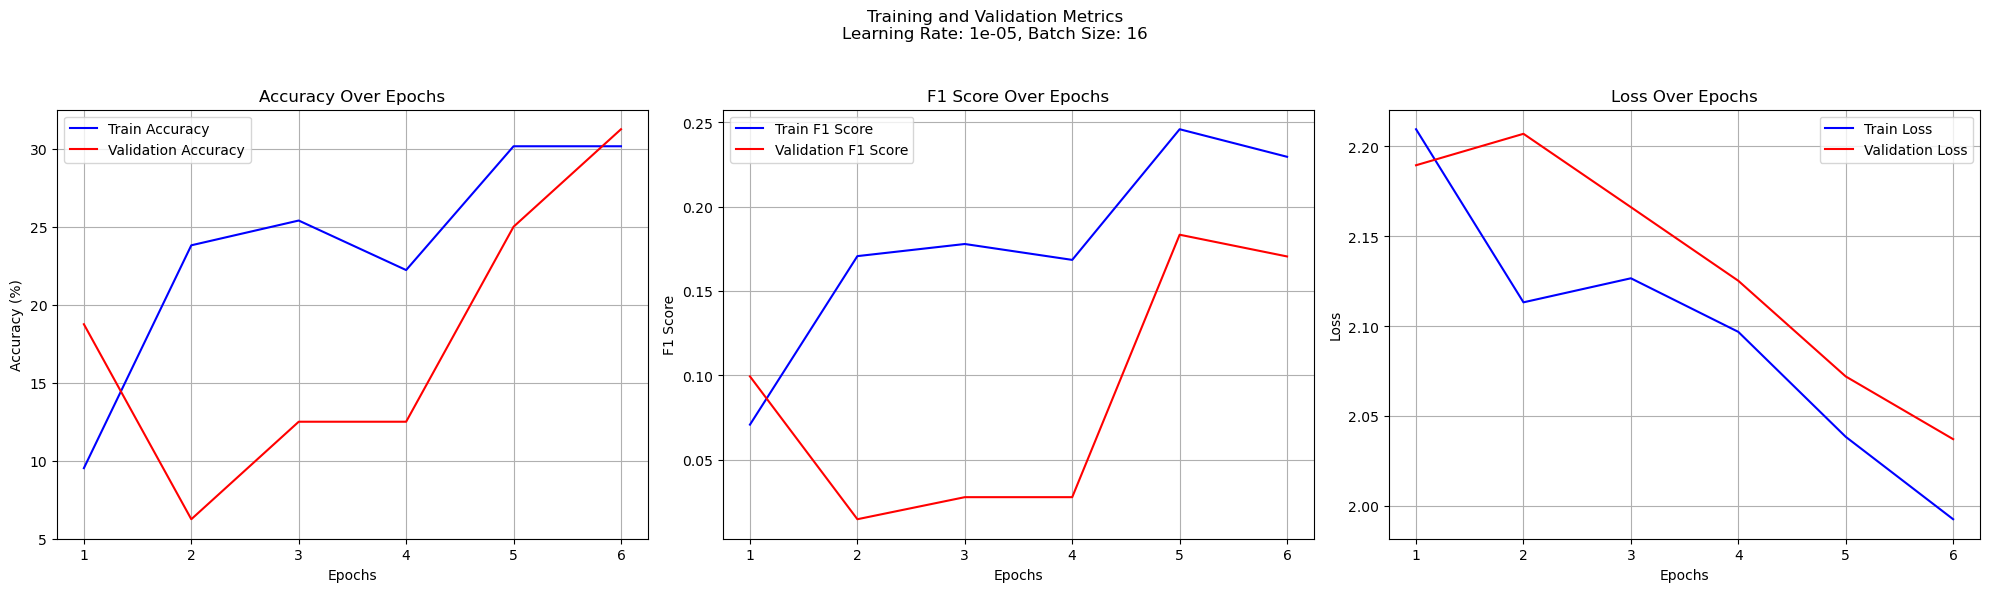

Training with params: {'learning_rate': 1e-05, 'batch_size': 32}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.276765, Accuracy: 11.111111%, F1 Score: 0.053247
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.181193, Accuracy: 14.285714%, F1 Score: 0.042155
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.142561, Accuracy: 11.111111%, F1 Score: 0.056963
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.113479, Accuracy: 17.460317%, F1 Score: 0.102548
Validation Accuracy: 18.750000%, Validation F1 Score: 0.112745


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 2.027048, Accuracy: 23.809524%, F1 Score: 0.187469
Validation Accuracy: 6.250000%, Validation F1 Score: 0.050000


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 2.024184, Accuracy: 22.222222%, F1 Score: 0.172749
Validation Accuracy: 18.750000%, Validation F1 Score: 0.154167


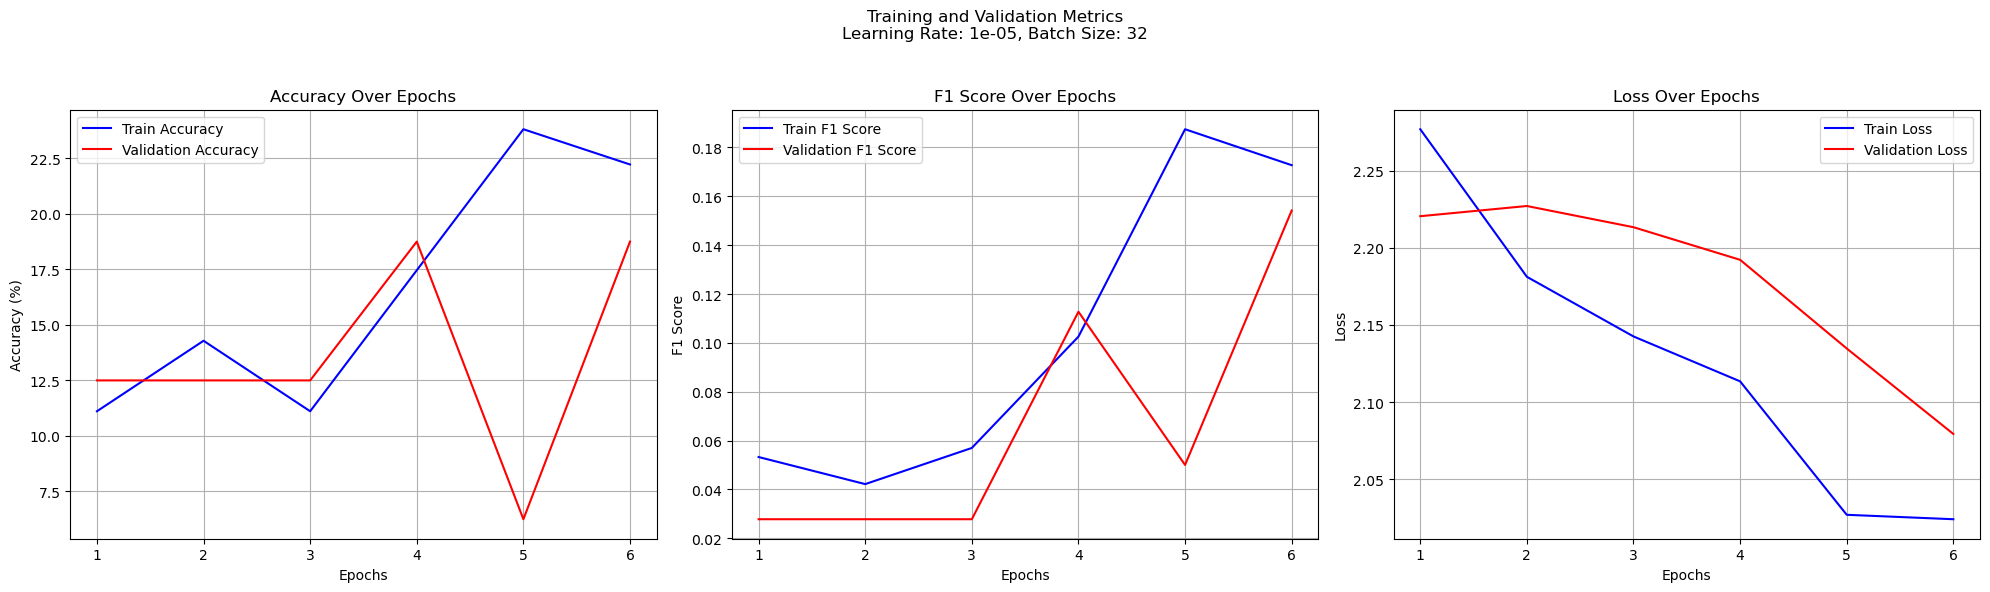

Training with params: {'learning_rate': 0.001, 'batch_size': 16}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.365084, Accuracy: 11.111111%, F1 Score: 0.075472
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.505798, Accuracy: 15.873016%, F1 Score: 0.078371
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.253097, Accuracy: 15.873016%, F1 Score: 0.069728
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.193771, Accuracy: 17.460317%, F1 Score: 0.122703
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 2.187119, Accuracy: 7.936508%, F1 Score: 0.065896
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 2.178095, Accuracy: 14.285714%, F1 Score: 0.102242
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


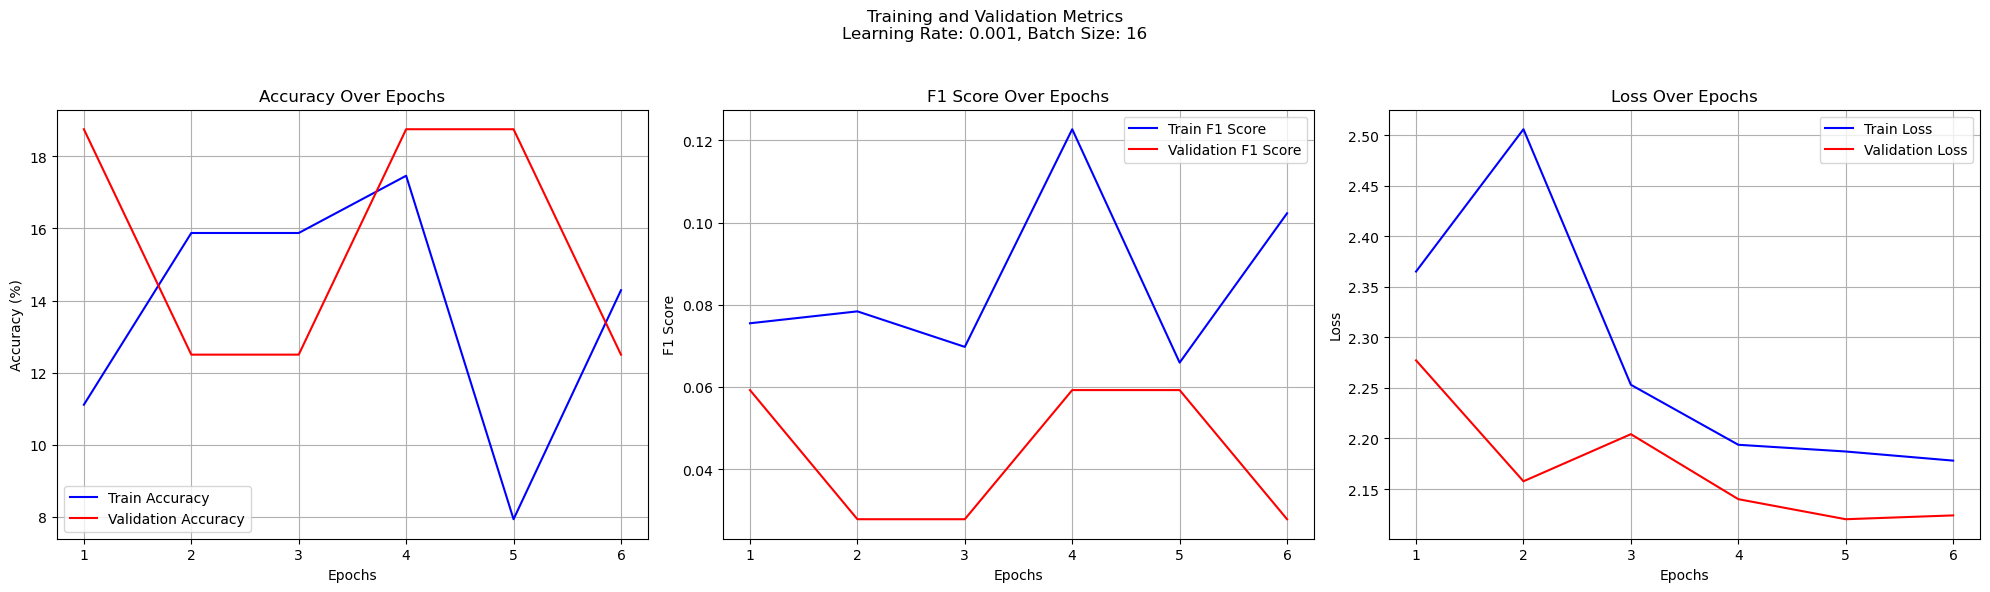

Training with params: {'learning_rate': 0.001, 'batch_size': 32}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.235002, Accuracy: 17.460317%, F1 Score: 0.122688
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.432241, Accuracy: 15.873016%, F1 Score: 0.084000
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.308989, Accuracy: 23.809524%, F1 Score: 0.141916
Validation Accuracy: 6.250000%, Validation F1 Score: 0.007353


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.458604, Accuracy: 4.761905%, F1 Score: 0.006803
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 2.211608, Accuracy: 15.873016%, F1 Score: 0.097976
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 2.259490, Accuracy: 19.047619%, F1 Score: 0.091575
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


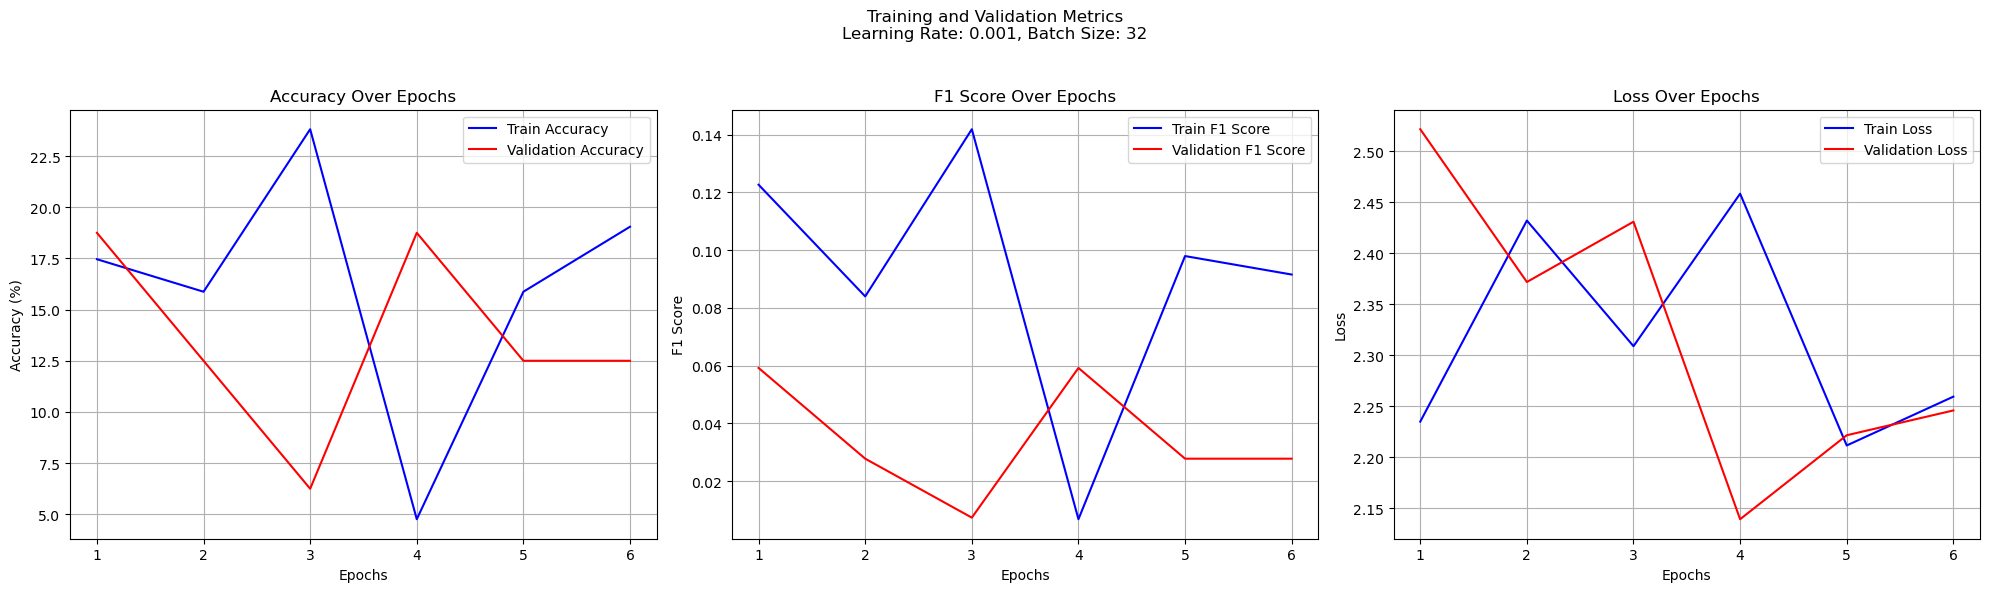

Best F1 Score: 0.4437
Best parameters: {'learning_rate': 5e-05, 'batch_size': 16}


In [30]:
def grid_search(param_grid):
    best_f1 = float('-inf')
    best_params = None
    # best_scheduler = None 
    # best_scheduler_params = None
    
    grid_combinations = list(product(*param_grid.values()))
    
    train_dataset = create_dataset(train_df, tokenizer, label_mapping)
    val_dataset = create_dataset(val_df, tokenizer, label_mapping)
    
    
    for params in grid_combinations:
        current_params = dict(zip(param_grid.keys(), params))
        
        print(f"Training with params: {current_params}")
        
        learning_rate = current_params['learning_rate']
        batch_size = current_params['batch_size']
        
        model = CustomBertModel(num_labels=len(filtered_labels_at_least_5_list))
        optimizer = AdamW(model.parameters(), lr=learning_rate)
        model.to(device)

        train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
        val_loader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

        # f1_train, f1_val, acc_train, acc_val, loss_train, loss_val, scheduler, scheduler_params = decay_lr_grid(
        #    model, train_loader, val_loader, optimizer, device, num_epochs
        # )

        f1_train, f1_val, acc_train, acc_val, loss_train, loss_val = train_with_validation(
            model, train_loader, val_loader, optimizer, device, num_epochs
        )

        learning_rates.append(learning_rate)
        batch_sizes.append(batch_size)
        f1_scores.append(f1_val[-1]) #######################################################

        plot(acc_train, acc_val , f1_train, f1_val, loss_train, loss_val, current_params)
        
        if f1_val[-1] > best_f1:
            best_f1 = f1_val[-1]
            best_params = current_params
            # best_scheduler = scheduler
            # best_scheduler_params = scheduler_params
    
    print(f"Best F1 Score: {best_f1:.4f}")
    print(f"Best parameters: {best_params}")
    # print(f"Best scheduler: {best_scheduler.__class__.__name__}")
    # print(f"Best scheduler parameters: {best_scheduler_params}")
    return best_params # best_scheduler, best_scheduler_params

params = grid_search(param_grid)
# params, scheduler, scheduler_params = grid_search(param_grid)



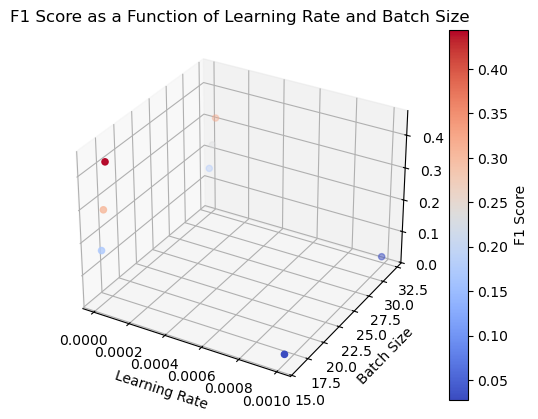

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(learning_rates, batch_sizes, f1_scores, c=f1_scores, cmap='coolwarm')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Batch Size')
ax.set_zlabel('F1 Score')
plt.colorbar(scatter, label='F1 Score')

plt.title('F1 Score as a Function of Learning Rate and Batch Size')
plt.show()

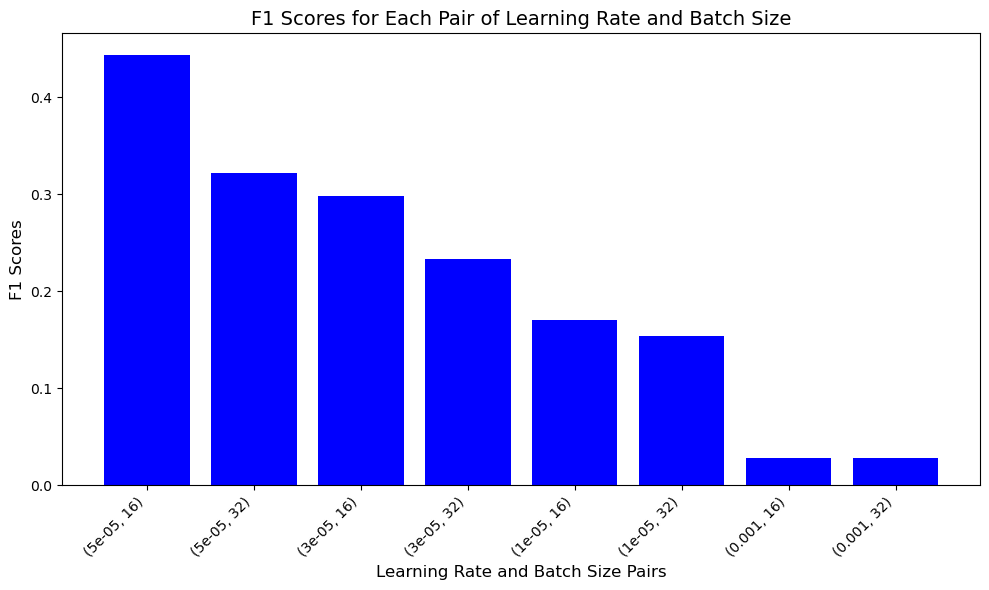

In [32]:
x_labels = [f"({lr:}, {bs:})" for lr, bs in zip(learning_rates, batch_sizes)]

plt.figure(figsize=(10, 6))
plt.bar(x_labels, f1_scores, color='blue')

plt.xlabel("Learning Rate and Batch Size Pairs", fontsize=12)
plt.ylabel("F1 Scores", fontsize=12)
plt.title("F1 Scores for Each Pair of Learning Rate and Batch Size", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()